In [1]:
import sys
sys.path.append("/data1/andrew/meng/mixehr/meng/VAE-EHR/src")
from importlib import reload

import numpy as np 
import pandas as pd
from tqdm import tqdm

import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
import vae
reload(vae)

from vae import VAE, VAETrainer

In [3]:
patient_icd_file = "/data1/andrew/meng/mixehr/data/Mimic/andrew_outputs/PATIENT_ICD_BINARY.csv"
patient_icd_df = pd.read_csv(patient_icd_file, sep=' ')

patient_icd_data = patient_icd_df.drop('SUBJECT_ID', axis=1)

data = torch.tensor(patient_icd_data.values).float()
print(data.shape)

torch.Size([46520, 6984])


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print((device))

feature_dim = data.shape[1]
print("Feature_dim: {}".format(feature_dim))
encoder_dim = [(250, 500), (500, 250), (250, 100)]
latent_dim = 10
decoder_dim = [(50, 100)]
model = VAE(
    feature_dim = feature_dim, 
    encoder_dim = encoder_dim,
    latent_dim = latent_dim,
    decoder_dim = decoder_dim,
    use_relu=False
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
print(type(optimizer))

cuda
Feature_dim: 6984
<class 'torch.optim.adam.Adam'>


In [5]:
date="200109"
experiment_name = "{}_patient_clusters_linear_architecture".format(date)
trainer = VAETrainer(model = model, device = device, optimizer = optimizer, experiment_name=experiment_name)

In [6]:
trainer.train(
    data=data, 
    epochs=10,
    batch_size=40,
    save_model_interval=5,
    clip_gradients = True,
    grad_norm_limit = 5
)

  0%|          | 0/1163 [00:00<?, ?it/s]/data1/andrew/meng/mixehr/meng/VAE-EHR/src/vae.py:181: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(self.model.parameters(), grad_norm_limit) #A value of 5 was shown to work
  1%|          | 9/1163 [00:00<00:13, 82.68it/s]

====> Epoch: 1 Average loss: 108254.9991


  1%|          | 8/1163 [00:00<00:14, 77.81it/s]

====> Epoch: 2 Average loss: 2132.8910


  1%|          | 9/1163 [00:00<00:13, 87.40it/s]

====> Epoch: 3 Average loss: 2082.5868


  1%|          | 8/1163 [00:00<00:14, 79.87it/s]

====> Epoch: 4 Average loss: 2062.6020


  1%|          | 10/1163 [00:00<00:11, 98.48it/s]

====> Epoch: 5 Average loss: 2043.8156


  1%|          | 8/1163 [00:00<00:14, 77.76it/s]

====> Epoch: 6 Average loss: 2033.3827


  1%|          | 10/1163 [00:00<00:12, 94.70it/s]

====> Epoch: 7 Average loss: 2025.9795


  1%|          | 11/1163 [00:00<00:11, 103.76it/s]

====> Epoch: 8 Average loss: 2018.5232


  1%|          | 11/1163 [00:00<00:10, 105.69it/s]

====> Epoch: 9 Average loss: 2012.8336


100%|██████████| 1163/1163 [00:11<00:00, 98.07it/s] 

====> Epoch: 10 Average loss: 2007.8924


In [7]:
trainer.model.load_state_dict(torch.load("VAE_exp_{}_epoch_{}.pkl".format(experiment_name, 10)))

<All keys matched successfully>

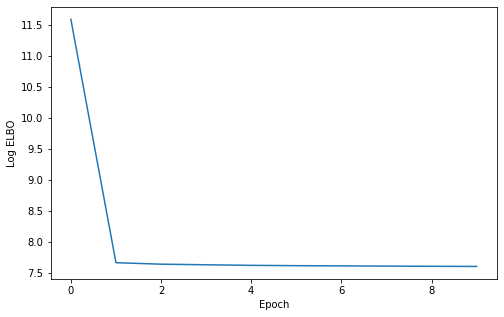

In [8]:
trainer.plot_elbo()